In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
import tensorflow as tf
from tensorflow.python.keras import Sequential
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import (Input, Add, Dense, Activation,
ZeroPadding2D, BatchNormalization, Flatten, Conv2D, 
AveragePooling2D, MaxPooling2D, Dropout)
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import (ReduceLROnPlateau,
EarlyStopping, ModelCheckpoint, LearningRateScheduler)
from IPython.display import display
from tensorflow.keras import backend as K
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
import plotly.express as px
import plotly.graph_objects as go

ModuleNotFoundError: No module named 'tensorflow'

In [8]:
data = np.random.random(size=(30,2))
print(data.shape)

(30, 2)


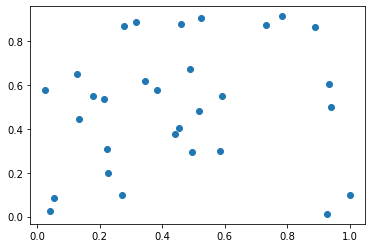

In [48]:
plt.scatter(data[:,0], data[:,1])

In [49]:
from sklearn.cluster import KMeans

In [50]:
#Objecto KMeans
#K=4
kmeans = KMeans(n_clusters=4).fit(data)
centroids = kmeans.cluster_centers_
print(centroids)

[[0.16395453 0.14242374]
 [0.56878845 0.8827482 ]
 [0.35572395 0.50187068]
 [0.94953019 0.30340129]]


<function matplotlib.pyplot.show(close=None, block=None)>

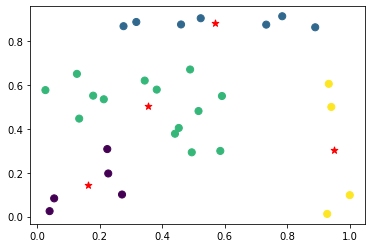

In [51]:
plt.scatter(data[:,0], data[:,1],c=kmeans.labels_.astype(float), s=50)
plt.scatter(centroids[:,0], centroids[:,1], c='red', marker='*', s=50)
plt.show

In [52]:
kmeans = KMeans(n_clusters=3).fit(data)
centroids = kmeans.cluster_centers_
print(centroids)

[[0.87674615 0.30251561]
 [0.25838836 0.38877875]
 [0.56240038 0.82201251]]


<function matplotlib.pyplot.show(close=None, block=None)>

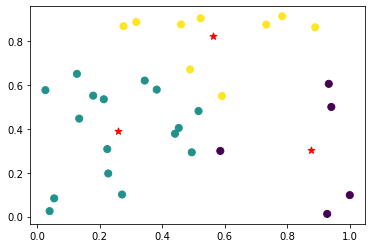

In [53]:
plt.scatter(data[:,0], data[:,1],c=kmeans.labels_.astype(float), s=50)
plt.scatter(centroids[:,0], centroids[:,1], c='red', marker='*', s=50)
plt.show

In [54]:
clust=kmeans.predict(data)
print(clust)

[2 1 2 2 2 1 2 1 1 2 0 1 1 0 2 1 0 1 1 0 0 1 2 1 2 1 1 1 1 1]


In [55]:
kmeans = KMeans(n_clusters=6).fit(data)
centroids = kmeans.cluster_centers_
print(centroids)

[[0.96300696 0.05499569]
 [0.20142445 0.56489212]
 [0.85526881 0.75037098]
 [0.51348982 0.40035132]
 [0.16395453 0.14242374]
 [0.41330144 0.84016659]]


<function matplotlib.pyplot.show(close=None, block=None)>

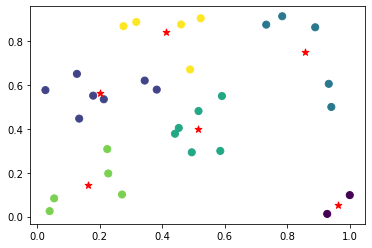

In [56]:
plt.scatter(data[:,0], data[:,1],c=kmeans.labels_.astype(float), s=50)
plt.scatter(centroids[:,0], centroids[:,1], c='red', marker='*', s=50)
plt.show

In [57]:
clust=kmeans.predict(data)
print(clust)

[2 4 5 5 2 3 3 1 3 2 2 4 4 2 5 3 0 3 1 3 0 1 5 4 5 4 1 1 1 1]


In [58]:
krange = range(1,10)
sse=[]
for k in krange:
    kmeans=KMeans(n_clusters=k).fit(data)
    sse.append(kmeans.inertia_)

C:\Users\saba-\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [59]:
sse

[4.786760763925306,
 2.981245523404714,
 1.8963911677726721,
 1.3591578799967623,
 0.902956053097102,
 0.5510080156896895,
 0.39782850034601025,
 0.28767811249510933,
 0.2165858633944952]

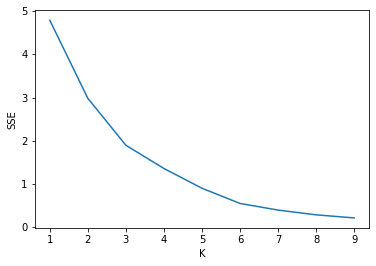

In [60]:
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(krange, sse)
#En este caso de datos el valor de k=6 es la mejor alternativa. Tecnica del codo